In [1]:
import warnings 
warnings.filterwarnings("ignore")

#data wrangling and pre-processing
import pandas as pd
import numpy as np

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from scipy import stats
from scipy.stats import norm
from math import sqrt

#cross validation
from sklearn.model_selection import train_test_split

#categorical encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
#standardize numeric values
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#ml models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet, HuberRegressor, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


#model accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Evaluating model performance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("DataScientist.csv")

In [3]:
df.shape

(3909, 17)

In [4]:
df.columns

Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')

In [5]:
df.drop(["Unnamed: 0","index"], axis=1, inplace=True)

In [6]:
df=df.rename(columns={"Job Title":"job_title","Salary Estimate":"salary_estimate","Job Description":"job_description",
                     "Rating":"rating","Company Name":"company_name","Location":"location","Headquarters":"headquarters",
                     "Size":"size","Founded":"founded","Type of ownership":"type_of_ownership","Industry":"industry",
                     "Sector":"sector","Revenue":"revenue","Competitors":"competitors","Easy Apply":"easy_apply"})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          3909 non-null   object 
 1   salary_estimate    3909 non-null   object 
 2   job_description    3909 non-null   object 
 3   rating             3909 non-null   float64
 4   company_name       3909 non-null   object 
 5   location           3909 non-null   object 
 6   headquarters       3909 non-null   object 
 7   size               3909 non-null   object 
 8   founded            3909 non-null   int64  
 9   type_of_ownership  3909 non-null   object 
 10  industry           3909 non-null   object 
 11  sector             3909 non-null   object 
 12  revenue            3909 non-null   object 
 13  competitors        3909 non-null   object 
 14  easy_apply         3909 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 458.2+ KB


In [8]:
df.describe()

,rating,founded
count,3909.000000,3909.000000
mean,3.283576,1479.154771
std,1.575749,855.750138
min,-1.000000,-1.000000
25%,3.200000,1625.000000
50%,3.700000,1976.000000
75%,4.100000,2002.000000
max,5.000000,2020.000000


In [9]:
df.describe(include="O")

,job_title,salary_estimate,job_description,company_name,location,headquarters,size,type_of_ownership,industry,sector,revenue,competitors,easy_apply
count,3909,3909,3909,3909,3909,3909,3909,3909,3909,3909,3909,3909,3909
unique,2079,148,3685,2075,191,543,9,15,96,26,14,422,2
top,Data Scientist,$93K-$151K (Glassdoor est.),The U.S. Department of the Treasury has a dist...,Apple\n4.1,"Austin, TX","New York, NY",10000+ employees,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1,-1
freq,274,62,14,60,345,297,993,1933,546,1124,1163,2760,3745


In [10]:
def missing_values(train):
    total=train.isnull().sum().sort_values(ascending=False)
    percent=round((train.isnull().sum().sort_values(ascending=False)/len(df))*100,2)
    return pd.concat([total,percent], axis=1, keys=['Total','Percent'])

missing_values(df)

,Total,Percent
job_title,0,0.0
salary_estimate,0,0.0
job_description,0,0.0
rating,0,0.0
company_name,0,0.0
location,0,0.0
headquarters,0,0.0
size,0,0.0
founded,0,0.0
type_of_ownership,0,0.0


In [11]:
df["job_title"].value_counts().nlargest(20)

Data Scientist                                                   274
Data Engineer                                                    260
Data Analyst                                                     246
Senior Data Scientist                                             91
Senior Data Analyst                                               47
Machine Learning Engineer                                         47
Big Data Engineer                                                 41
Business Intelligence Analyst                                     39
Senior Data Engineer                                              37
Lead Data Scientist                                               23
Sr. Data Scientist                                                23
Research Scientist                                                22
Data Modeler                                                      17
Junior Data Analyst                                               15
Principal Data Scientist          

In [12]:
def percentage_value_counts(train,feature):
    """This function takes in a dataframe and a column and finds the percentage of the value counts"""
    percent=pd.DataFrame(round(train.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ##creating a df with ith
    total=pd.DataFrame(train.loc[:,feature].value_counts(dropna=False))
    ##concating percent and total dataframe
    total.columns=['Total']
    percent.columns=['Percent']
    return pd.concat([total, percent], axis=1)

In [13]:
percentage_value_counts(df,"founded")

,Total,Percent
-1,977,24.99
1999,110,2.81
2002,100,2.56
2004,91,2.33
2015,90,2.30
...,...,...
1908,1,0.03
1893,1,0.03
1901,1,0.03
1917,1,0.03


In [14]:
percentage_value_counts(df,"rating")

,Total,Percent
-1.0,409,10.46
3.9,302,7.73
3.7,290,7.42
4.1,272,6.96
3.6,252,6.45
3.8,238,6.09
4.0,200,5.12
3.4,185,4.73
3.5,176,4.50
5.0,160,4.09


In [15]:
percentage_value_counts(df,"size")

,Total,Percent
10000+ employees,993,25.40
51 to 200 employees,563,14.40
1001 to 5000 employees,553,14.15
1 to 50 employees,550,14.07
201 to 500 employees,418,10.69
501 to 1000 employees,307,7.85
-1,229,5.86
5001 to 10000 employees,219,5.60
Unknown,77,1.97


In [16]:
## dealing with missing values
##As some of the columns contains -1 or '-1.0' or '-1' etc . We need to clean this(This is kind of null values)
#Replace -1 or -1.0 or '-1' to NaN

df=df.replace(-1,np.nan)
df=df.replace(-1.0,np.nan)
df=df.replace('-1',np.nan)
df=df.replace('-1.0',np.nan)

In [17]:
missing_values(df)

,Total,Percent
easy_apply,3745,95.80
competitors,2760,70.61
founded,977,24.99
industry,546,13.97
sector,546,13.97
rating,409,10.46
headquarters,240,6.14
size,229,5.86
type_of_ownership,229,5.86
revenue,229,5.86


In [18]:
def title_seniority(title):
    if "sr." in title.lower() or "senior" in title.lower() or "lead" in title.lower() or "principal" in title.lower():
        return "sr"
    elif "jr" in title.lower() or "junior" in title.lower():
        return "jr"
    else:
        return "other"
    
df["job_seniority"]=df["job_title"].apply(title_seniority)

In [19]:
def title_cleaner(title):
    if "data scientist" in title.lower() or "scientist" in title.lower():
        return "data scientist"
    elif "engineer" in title.lower():
        return "data engineer"
    elif "data analyst" in title.lower():
        return "data analyst"
    elif "machine learning" in title.lower():
        return "mle"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "other"
    
df["job_title"]=df["job_title"].apply(title_cleaner)

In [20]:
#assume hours per week = 40
hours_per_week=40
weeks_per_year=52

for i in range(df.shape[0]):
    salary_estimate=df.loc[i,"salary_estimate"]
    salary_estimate=salary_estimate.replace("$","")
    
    if "Per Hour" in salary_estimate:
        lower,upper=salary_estimate.split("-")
        upper,_=upper.split("Per")
        upper=upper.strip()
        lower=int(lower)*hours_per_week*weeks_per_year*(1/1000)
        upper=int(upper)*hours_per_week*weeks_per_year*(1/1000)
    else:
        lower,upper=salary_estimate.split("-")
        lower=lower.replace("K","")
        upper,_=upper.split("(")
        upper=upper.replace("K","")
        upper=upper.strip()
        
    lower=int(lower)
    upper=int(upper)
    df.loc[i,"min_salary"]=lower
    df.loc[i,"max_salary"]=upper

In [21]:
df["avg_salary"]=df[["min_salary","max_salary"]].mean(axis=1)

In [22]:
df["company_name"]=df["company_name"].str.replace("\n.*","")

In [23]:
df["state"]=df["location"].apply(lambda x: x.split(",")[1])

In [24]:
df["same_state"]=df.apply(lambda x:1 if x["location"]==x["headquarters"] else 0, axis=1)

In [25]:
df["age"]=df["founded"].apply(lambda x:x if x<1 else 2021-x)

##### Exploratory Data Analysis

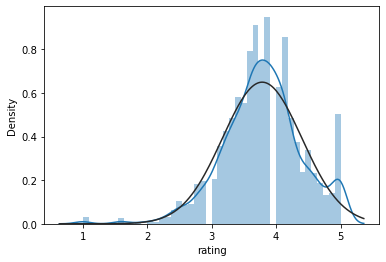

In [26]:
#histogram and normal probability plot
sns.distplot(df["rating"], fit=norm);


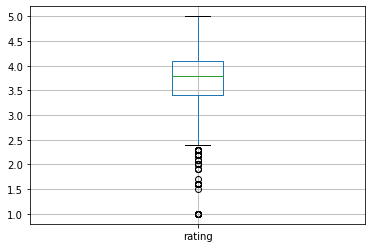

In [27]:
df.boxplot(column="rating")

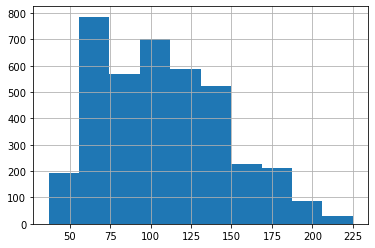

In [28]:
df.avg_salary.hist()

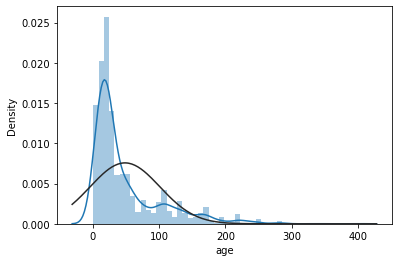

In [29]:
#histogram and normal probability plot
sns.distplot(df['age'], fit=norm);


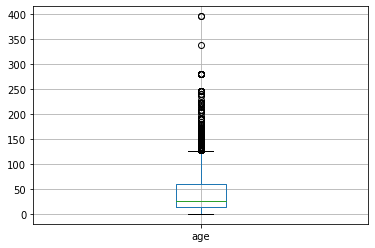

In [30]:
df.boxplot(column="age")

In [31]:
df[["rating","age","avg_salary"]].corr()

,rating,age,avg_salary
rating,1.000000,-0.100847,0.079283
age,-0.100847,1.000000,-0.065031
avg_salary,0.079283,-0.065031,1.000000


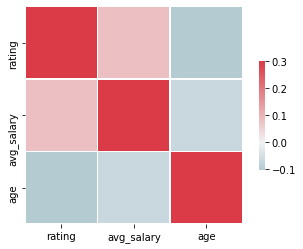

In [32]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['rating','avg_salary','age']].corr(), vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

Text(0, 0.5, 'Counts')

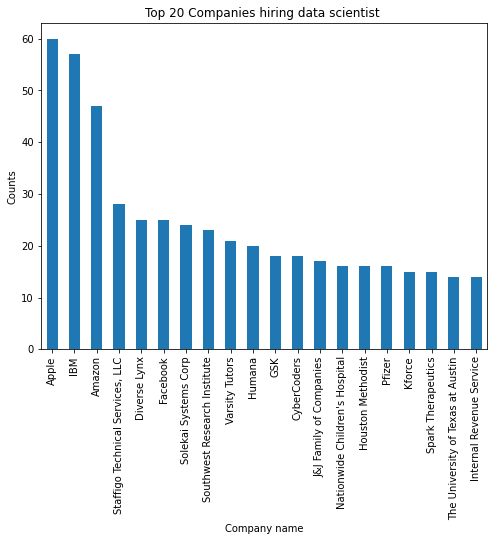

In [33]:
df1=df['company_name'].value_counts().sort_values(ascending=False)[:20]

fig,ax=plt.subplots(figsize=(8,6))
df1.plot(ax=ax, kind='bar')
plt.title('Top 20 Companies hiring data scientist ')
plt.xlabel('Company name')
plt.ylabel('Counts')

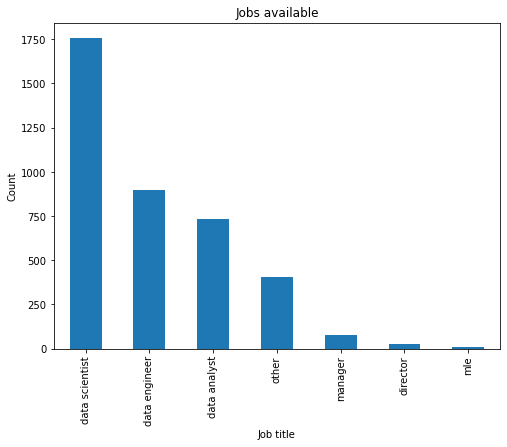

In [34]:
df1=df['job_title'].value_counts().sort_values(ascending=False)

fig,ax=plt.subplots(figsize=(8,6))
df1.plot(ax=ax, kind='bar')
plt.title("Jobs available")
plt.ylabel("Count")
plt.xlabel("Job title")
plt.show()

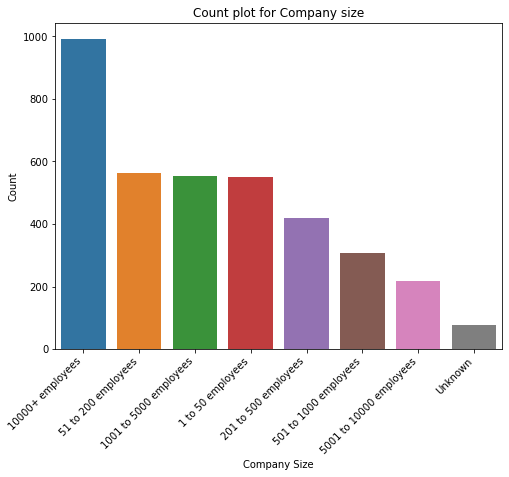

In [35]:
plt.figure(figsize=(8,6))
g=sns.countplot(x='size', data=df, order=df['size'].value_counts().index)
plt.title("Count plot for Company size")
plt.xlabel("Company Size")
plt.ylabel("Count")
g=g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

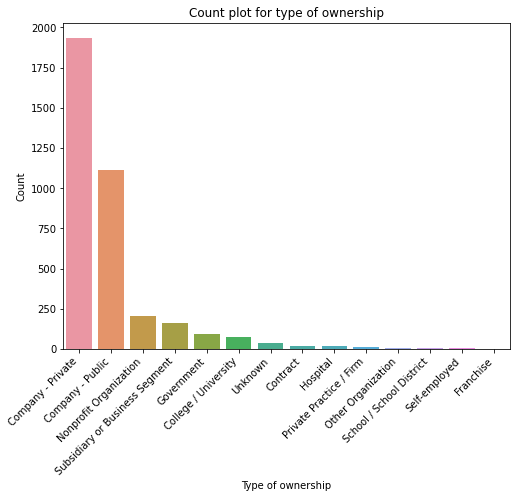

In [36]:
plt.figure(figsize=(8,6))
g=sns.countplot(x='type_of_ownership', data=df, order=df['type_of_ownership'].value_counts().index)
plt.title('Count plot for type of ownership')
plt.xlabel('Type of ownership')
plt.ylabel('Count')
g=g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

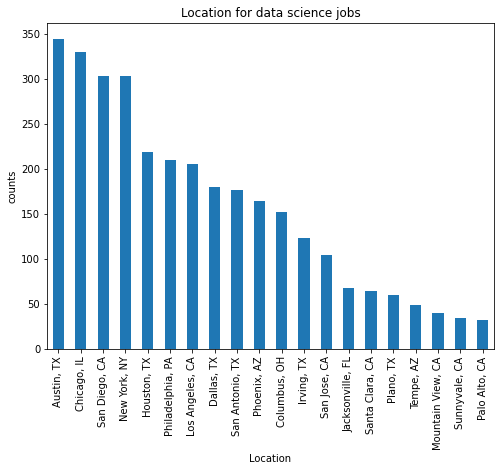

In [37]:
df1=df['location'].value_counts().sort_values(ascending=False)[:20]

fig,ax=plt.subplots(figsize=(8,6))
df1.plot(ax=ax, kind='bar')
plt.title("Location for data science jobs")
plt.xlabel('Location')
plt.ylabel("counts")
plt.show()

In [38]:
#Exploring avg_salary and job title
pd.pivot_table(df, index='job_title', values='avg_salary')

,avg_salary
job_title,
data analyst,102.186821
data engineer,103.143255
data scientist,115.342914
director,99.980769
manager,108.931250
mle,109.000000
other,98.109606


In [39]:
pd.pivot_table(df, index=["job_title","job_seniority"], values="avg_salary")

avg_salary
job_title      job_seniority            
data analyst   jr             102.303571
               other          102.530252
               sr             100.349558
data engineer  jr             105.428571
               other          102.759388
               sr             104.663743
data scientist jr             101.833333
               other          113.631703
               sr             120.116667
director       other           97.125000
               sr             134.250000
manager        other          108.606667
               sr             113.800000
mle            other          108.583333
               sr             111.500000
other          jr              56.500000
               other           98.930435
               sr              94.083333

In [40]:
pd.pivot_table(df, index='state', values='avg_salary').sort_values(by='avg_salary', ascending=False)

,avg_salary
state,
NY,135.677316
DE,133.550000
CA,133.087465
NJ,118.687500
United Kingdom,99.625000
AZ,97.349153
TX,95.598962
PA,94.675926
OH,94.093220


In [41]:
pd.pivot_table(df, index=['state','job_title'], values='avg_salary').sort_values(by='state', ascending=False)

avg_salary
state           job_title                 
 United Kingdom data scientist   69.500000
                data analyst    190.000000
 TX             other            91.776074
                mle              86.000000
                manager         107.060000
...                                    ...
 AZ             director        116.000000
                data engineer    95.023585
                mle              63.000000
                other            96.783784
                data analyst     93.234375

[62 rows x 1 columns]

In [42]:
#count of data scientist in each state required
pd.pivot_table(df, index=['state','job_title'], values='avg_salary', aggfunc='count').sort_values(by='state', ascending=False)

avg_salary
state           job_title                 
 United Kingdom data scientist           3
                data analyst             1
 TX             other                  163
                mle                      1
                manager                 25
...                                    ...
 AZ             director                 2
                data engineer          106
                mle                      1
                other                   37
                data analyst            64

[62 rows x 1 columns]

In [43]:
pd.pivot_table(df[df['job_title']=='data scientist'], index=['state'], values='avg_salary').sort_values(by='avg_salary', ascending=False)

,avg_salary
state,
DE,135.400000
NY,135.037383
CA,134.403465
NJ,128.977273
AZ,105.894737
OH,102.778409
TX,100.195122
PA,96.605263
IL,87.035461


#### Feature Engineering

In [44]:
missing_values(df)

,Total,Percent
easy_apply,3745,95.80
competitors,2760,70.61
age,977,24.99
founded,977,24.99
industry,546,13.97
sector,546,13.97
rating,409,10.46
headquarters,240,6.14
size,229,5.86
type_of_ownership,229,5.86


In [45]:
df['python_req']=df['job_description'].apply(lambda x:1 if 'python' in x.lower() else 0)
df['excel_req']=df['job_description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['sql_req']=df['job_description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['tableau_req']=df['job_description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

In [46]:
df["age"]=np.log(df["age"])

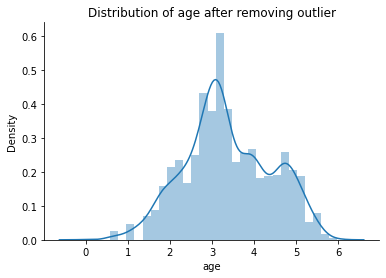

In [47]:
sns.distplot(df["age"])
plt.title("Distribution of age after removing outlier")
sns.despine()
plt.show()

In [48]:
#Taking top 9 type ownership and replacing the remaining states with others

company_ownership_list=list(df['type_of_ownership'].value_counts()[:10].index)

def company_ownership_simplifier(text):
    if text not in company_ownership_list:
        return 'other'
    else:
        return text
    
df['type_of_ownership']=df['type_of_ownership'].apply(company_ownership_simplifier)

In [49]:
#Taking top 9 sector and replacing the remaining sectors with other
sector_list=list(df['sector'].value_counts()[:10].index)

def  sector_cleaner(text):
    if text not in sector_list:
        return 'other'
    else:
        return text
    
df['sector']=df['sector'].apply(sector_cleaner)

In [50]:
#Taking top 9 states and replacing the remaining states with others

job_location_list=list(df['state'].value_counts()[:10].index)

def job_location_simplifier(text):
    if text not in job_location_list:
        return 'other'
    else:
        return text
    
df['state']=df['state'].apply(job_location_simplifier)

In [51]:
#df.drop(["job_description","headquarters","founded","industry"],axis=1, inplace=True)

In [52]:
size_map={'1 to 50 employees':1,'51 to 200 employees':2,'201 to 500 employees':3,'501 to 1000 employees':4,
          '1001 to 5000 employees':5,'5001 to 10000 employees':6,'10000plus employees':7}

df["size"]=df["size"].map(size_map)

In [53]:
# Mapping ranks to 'revenue' column
revenue_map={'Less than $1 million (USD)':1,'$1 to $5 million (USD)':2,'$5 to $10 million (USD)':3,
             '$10 to $25 million (USD)':4,'$25 to $50 million (USD)':5,'$50 to $100 million (USD)':6,
            '$100 to $500 million (USD)':7,'$500 million to $1 billion (USD)':8,'$1 to $2 billion (USD)':9,
            '$2 to $5 billion (USD)':10,'$5 to $10 billion (USD)':11,'$10+ billion (USD)':12}

df['revenue']=df['revenue'].map(revenue_map)

In [54]:
# Mapping ranks to 'job_seniority' column
job_seniority_map = {'other': 1, 'jr': 2, 'sr': 3}

df['job_seniority'] = df['job_seniority'].map(job_seniority_map)

In [55]:
df.drop(["easy_apply","competitors","salary_estimate","company_name","location","min_salary","max_salary","job_description",
         "headquarters","founded","industry"],axis=1,inplace=True)

In [56]:
df.dropna(axis=0, inplace=True)

In [57]:
df=pd.get_dummies(columns=["job_title","type_of_ownership","sector","state"], data=df, drop_first=True)

In [58]:
df.shape

(1270, 46)

##### Train Test Split

In [59]:
X=df.drop(["avg_salary"], axis=1)
y=df["avg_salary"]

In [60]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=22)

In [61]:
sfs=SFS(LinearRegression(),
        k_features=11,
       forward=True,
       floating=True,
       scoring="r2",
       cv=5)

In [62]:
sfs.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), floating=True,
                          k_features=11, scoring='r2')

In [63]:
sfs.k_feature_names_ 

('size',
 'python_req',
 'job_title_data scientist',
 'type_of_ownership_Contract',
 'type_of_ownership_Nonprofit Organization',
 'sector_Information Technology',
 'state_ CA',
 'state_ DE',
 'state_ FL',
 'state_ IL',
 'state_ NY')

In [64]:
X_train=X_train[['size','python_req','job_title_data scientist','type_of_ownership_Contract','sector_Information Technology',
                 'type_of_ownership_Nonprofit Organization','state_ CA','state_ DE','state_ FL','state_ IL','state_ NY']]
X_test=X_test[['size','python_req','job_title_data scientist','type_of_ownership_Contract','sector_Information Technology',
                 'type_of_ownership_Nonprofit Organization','state_ CA','state_ DE','state_ FL','state_ IL','state_ NY']]

In [65]:
models =[
    ["Linear Regression: ", LinearRegression()],
    ["Lasso: ", Lasso()],
    ["Ridge: ", Ridge()],
    ["Elastic Net: ", ElasticNet()],
    ["SGD Regressor: ", SGDRegressor()],
    ["Decision Tree Regressor: ", DecisionTreeRegressor()],
    ["Random Forest Regressor: ", RandomForestRegressor()],
    ["KNeighborsRegressor: ", KNeighborsRegressor()],
    ["AdaBoostRegressor: ", AdaBoostRegressor()],
    ["SVM: ", SVR()],
    ["GradientBoostingRegressor: ", GradientBoostingRegressor()],
    ["XGBoost: ", XGBRegressor()]
]

print("Results: ")
for name,model in models:
    model=model
    model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test,predictions))))

Results: 
Linear Regression:  32.115173224283375
Lasso:  32.933148831691874
Ridge:  32.040809618760896
Elastic Net:  35.85568323875961
SGD Regressor:  31.87583440509902
Decision Tree Regressor:  36.45783202402103
Random Forest Regressor:  35.17762714234039
KNeighborsRegressor:  34.56791386953136
AdaBoostRegressor:  32.435458744065166
SVM:  35.67836777317018
GradientBoostingRegressor:  32.63274372325647
[05:17:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost:  32.420499832808815


##### GirdSearch

In [66]:
ridge_reg=Ridge()
grid=GridSearchCV(estimator=ridge_reg, param_grid={"alpha":[0.001,0.01,0.05,0.1,0.3,0.5,0.8,2,5,10,20]}, cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 2, 5,
                                   10, 20]})

In [67]:
grid.best_params_

{'alpha': 0.001}

In [68]:
sgd_reg=SGDRegressor()
grid=GridSearchCV(estimator=sgd_reg, param_grid={"penalty":["l2","l1","elasticnet"],
                                                "alpha":[0.001,0.01,0.05,0.1,0.3,0.5,0.8,2,5,10,20],
                                                "l1_ratio":[0.001,0.01,0.05,0.1,0.3,0.5,0.8,1]}, cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SGDRegressor(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 2, 5,
                                   10, 20],
                         'l1_ratio': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [69]:
grid.best_params_

{'alpha': 0.01, 'l1_ratio': 0.05, 'penalty': 'l1'}

In [70]:
ada= AdaBoostRegressor()

grid=GridSearchCV(estimator=ada, param_grid={"learning_rate":[0.001,0.01,0.05,1],
                                           "loss":["linear","square","exponential"]}, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 1],
                         'loss': ['linear', 'square', 'exponential']})

In [71]:
grid.best_params_

{'learning_rate': 0.001, 'loss': 'exponential'}

In [72]:
gbrt= GradientBoostingRegressor()

grid=GridSearchCV(estimator=gbrt, param_grid={"max_depth":[2,5,7,10],
                                             "n_estimators":[5,7,10,50,100,200]}, cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [5, 7, 10, 50, 100, 200]})

In [73]:
grid.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [74]:
models =[
    ["Ridge: ", Ridge(alpha= 0.001)],
    ["SGD Regressor: ", SGDRegressor(alpha=0.01,l1_ratio=0.5,penalty='l1')],
    ["AdaBoostRegressor: ", AdaBoostRegressor(learning_rate=0.01,loss='exponential')],
    ["GradientBoostingRegressor: ", GradientBoostingRegressor(max_depth=2, n_estimators=100)]]

print("Results: ")
for name,model in models:
    model=model
    model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test,predictions))))

Results: 
Ridge:  32.115056827205336
SGD Regressor:  31.937296509915946
AdaBoostRegressor:  32.26264605238212
GradientBoostingRegressor:  32.20320963342341
